<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/executive/K_Means_Part_2_CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings

#Data Loading

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')

In [77]:
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded with 41544 rows and 60 columns


In [78]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [80]:
df.isnull().sum()

,0
Total Household Income,0
Region,0
Total Food Expenditure,0
Main Source of Income,0
Agricultural Household indicator,0
Bread and Cereals Expenditure,0
Total Rice Expenditure,0
Meat Expenditure,0
Total Fish and marine products Expenditure,0
Fruit Expenditure,0


In [81]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


In [82]:
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values:
Household Head Occupation         7536
Household Head Class of Worker    7536
Toilet Facilities                 1580
dtype: int64


#Data Cleaning

In [83]:
# Handling missing values
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Create imputers for numeric and categorical data
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [84]:
# Apply imputation
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

In [85]:
# Remove duplicates
print("Checking for duplicates...")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows.")

Checking for duplicates...
Number of duplicate rows: 0



Handling outliers in numeric features...


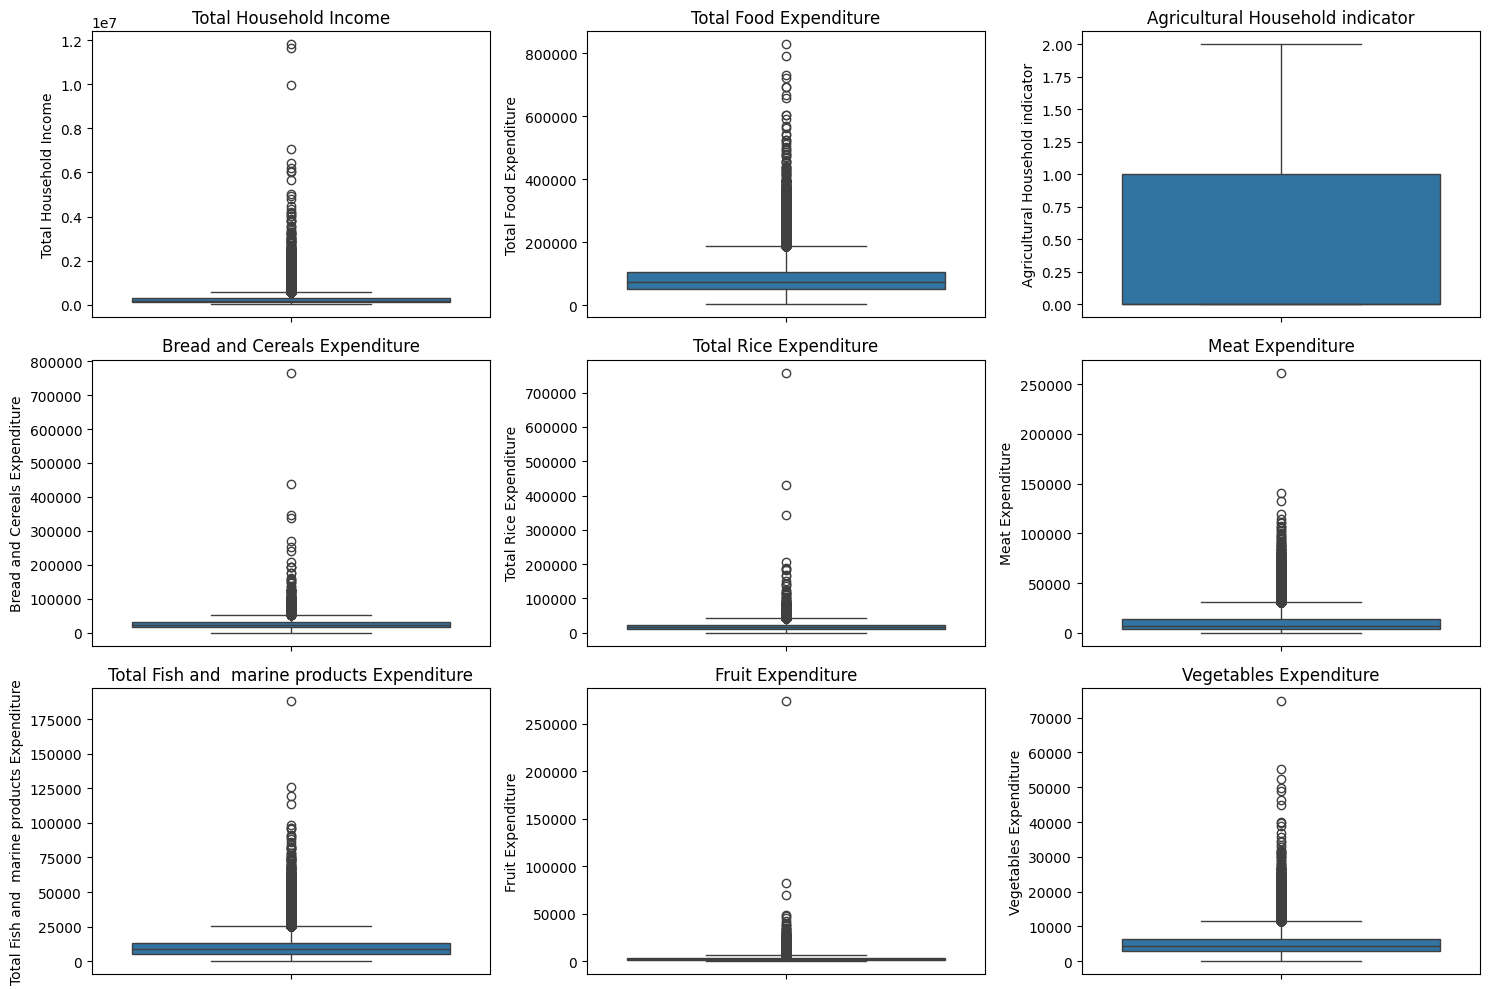

In [86]:
# Outlier Detection and Handling
print("\nHandling outliers in numeric features...")
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features[:min(9, len(numeric_features))]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [87]:
# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

In [88]:
# Apply outlier capping to income and expenditure columns
income_expenditure_cols = [col for col in numeric_features if 'Income' in col or 'Expenditure' in col]
for column in income_expenditure_cols:
    df = cap_outliers(df, column)

#Data Preprocessing

In [89]:
# Encode categorical variables
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [90]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

In [91]:
# Apply preprocessing
X_processed = preprocessor.fit_transform(df)
print(f"Processed data shape: {X_processed.shape}")

Processed data shape: (41544, 554)


#PCA

In [92]:
# Determine number of components to explain 90% variance
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_processed)

In [93]:
print(f"Number of PCA components: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {sum(pca.explained_variance_ratio_)}")
print(f"PCA transformed data shape: {X_pca.shape}")

Number of PCA components: 46
Explained variance ratio: [0.24638391 0.07442193 0.04002033 0.03232269 0.02894021 0.02692614
 0.02427838 0.0221448  0.02014827 0.01952038 0.0185037  0.01751509
 0.01673079 0.01591379 0.01489638 0.01414527 0.01367388 0.01355382
 0.01319112 0.0129805  0.01276935 0.01207562 0.01196409 0.0115303
 0.01101814 0.01076502 0.0102102  0.01001161 0.0096339  0.00932119
 0.00867248 0.00847854 0.00804076 0.00789455 0.00748463 0.00737937
 0.00702749 0.00676585 0.00645174 0.00608513 0.00591731 0.00554222
 0.00534575 0.00501169 0.00464478 0.00437941]
Cumulative explained variance: 0.9006324876445805
PCA transformed data shape: (41544, 46)


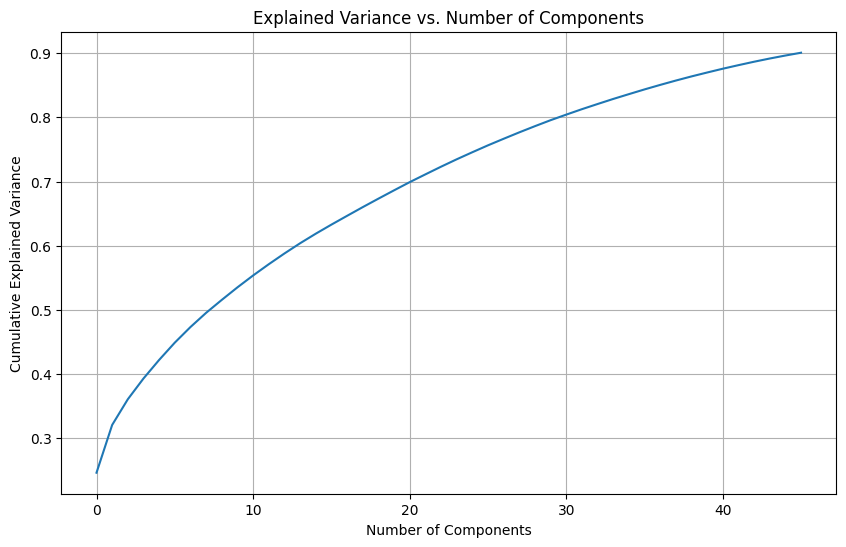

In [94]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [95]:
# Determine optimal number of clusters using silhouette score
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

For n_clusters = 2, the silhouette score is 0.250
For n_clusters = 3, the silhouette score is 0.109
For n_clusters = 4, the silhouette score is 0.066
For n_clusters = 5, the silhouette score is 0.066
For n_clusters = 6, the silhouette score is 0.063
For n_clusters = 7, the silhouette score is 0.049
For n_clusters = 8, the silhouette score is 0.047
For n_clusters = 9, the silhouette score is 0.051
For n_clusters = 10, the silhouette score is 0.050


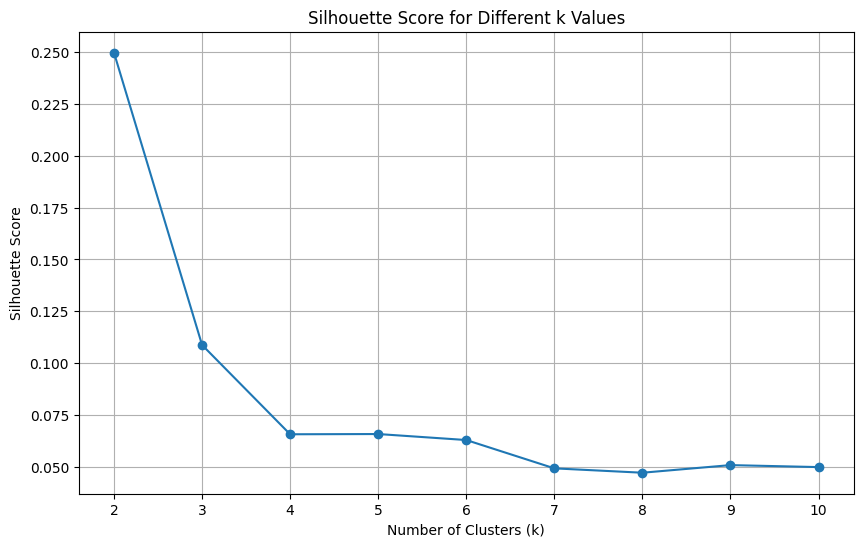

In [96]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.show()

In [97]:
# Choose the optimal k value based on the highest silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters based on silhouette score: {optimal_k}")
print(f"Maximum silhouette score: {max(silhouette_scores):.3f}")


Optimal number of clusters based on silhouette score: 2
Maximum silhouette score: 0.250


In [99]:
if max(silhouette_scores) < 0.5:
    print("\nSilhouette score is below 0.5. Attempting to improve clustering by applying additional preprocessing...")

    # Try removing some less relevant features that might add noise
    # Using feature importance from PCA
    top_features_indices = np.argsort(-np.abs(pca.components_[0]))[:20]  # Top 20 features from first component

    # Create a new dataset with only the top features
    all_features = list(numeric_features) + list(categorical_features)
    top_features = np.array(all_features)[top_features_indices]
    X_selected = X_processed[:, top_features_indices]

    # Apply PCA again on selected features
    pca_improved = PCA(n_components=0.9)
    X_pca_improved = pca_improved.fit_transform(X_selected)

    # Try clustering again
    silhouette_scores_improved = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_pca_improved)
        silhouette_avg = silhouette_score(X_pca_improved, cluster_labels)
        silhouette_scores_improved.append(silhouette_avg)
        print(f"For n_clusters = {k} (improved), the silhouette score is {silhouette_avg:.3f}")

    # Choose the better approach
    if max(silhouette_scores_improved) > max(silhouette_scores):
        optimal_k = k_range[silhouette_scores_improved.index(max(silhouette_scores_improved))]
        print(f"\nImproved optimal number of clusters: {optimal_k}")
        print(f"Improved maximum silhouette score: {max(silhouette_scores_improved):.3f}")
        X_pca = X_pca_improved
        silhouette_scores = silhouette_scores_improved
    else:
        print("\nNo improvement achieved. Keeping original results.")


Silhouette score is below 0.5. Attempting to improve clustering by applying additional preprocessing...
For n_clusters = 2 (improved), the silhouette score is 0.425
For n_clusters = 3 (improved), the silhouette score is 0.281
For n_clusters = 4 (improved), the silhouette score is 0.204
For n_clusters = 5 (improved), the silhouette score is 0.161
For n_clusters = 6 (improved), the silhouette score is 0.158
For n_clusters = 7 (improved), the silhouette score is 0.137
For n_clusters = 8 (improved), the silhouette score is 0.143
For n_clusters = 9 (improved), the silhouette score is 0.136
For n_clusters = 10 (improved), the silhouette score is 0.121

Improved optimal number of clusters: 2
Improved maximum silhouette score: 0.425


In [100]:
# If silhouette score is still below 0.5, experiment with different clustering algorithms
if max(silhouette_scores) < 0.5:
    print("\nSilhouette score is still below 0.5. Consider trying different clustering algorithms or additional feature engineering.")


Silhouette score is still below 0.5. Consider trying different clustering algorithms or additional feature engineering.


#K Means Clustering

In [101]:
# Apply K-means with the optimal number of clusters
print(f"\nApplying K-means with {optimal_k} clusters...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)


Applying K-means with 2 clusters...


In [102]:
# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Analyze clusters
print("\nCluster Analysis:")
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)


Cluster Analysis:
Cluster sizes:
Cluster
0    11315
1    30229
Name: count, dtype: int64


In [103]:
# Calculate mean values of important variables for each cluster
print("\nCluster characteristics:")
important_vars = ['Total Household Income',
                  'Total Food Expenditure',
                  'Total Income from Entrepreneurial Acitivites',
                  'Housing and water Expenditure',
                  'Education Expenditure',
                  'Household Head Age',
                  'Total Number of Family members']

cluster_means = df.groupby('Cluster')[important_vars].mean()
print(cluster_means)


Cluster characteristics:
         Total Household Income  Total Food Expenditure  \
Cluster                                                   
0                 420774.237539           133093.469532   
1                 143136.679133            63802.984721   

         Total Income from Entrepreneurial Acitivites  \
Cluster                                                 
0                                        53930.016494   
1                                        36027.766809   

         Housing and water Expenditure  Education Expenditure  \
Cluster                                                         
0                         64907.945382            5296.797260   
1                         21311.691753            1920.471633   

         Household Head Age  Total Number of Family members  
Cluster                                                      
0                 52.742466                        5.155899  
1                 50.872010                        4.440273  

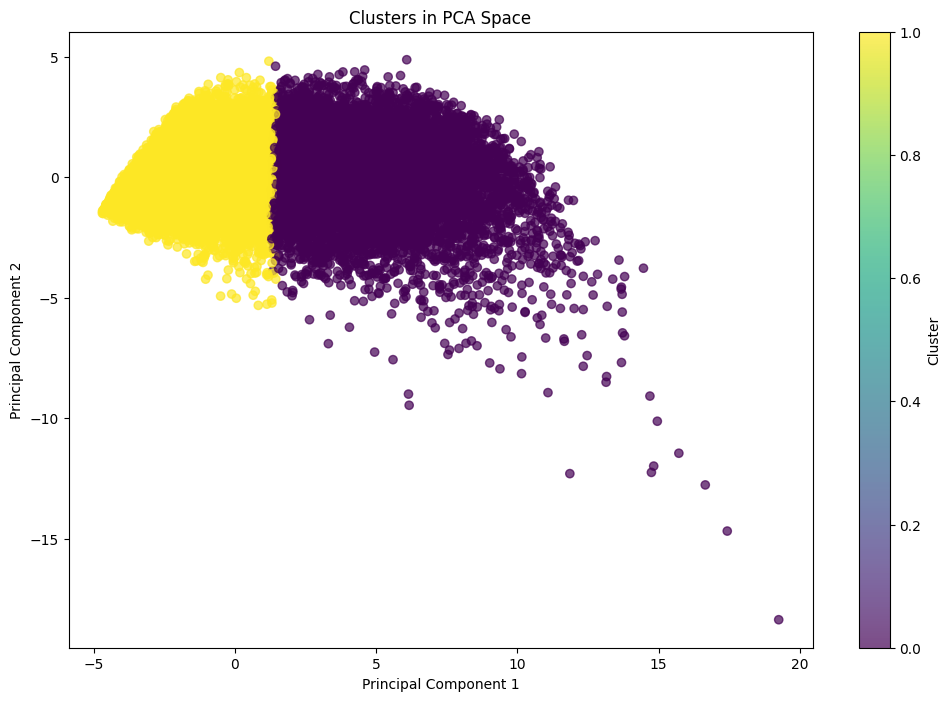

In [104]:
# Plot clusters in 2D PCA space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in PCA Space')
plt.show()

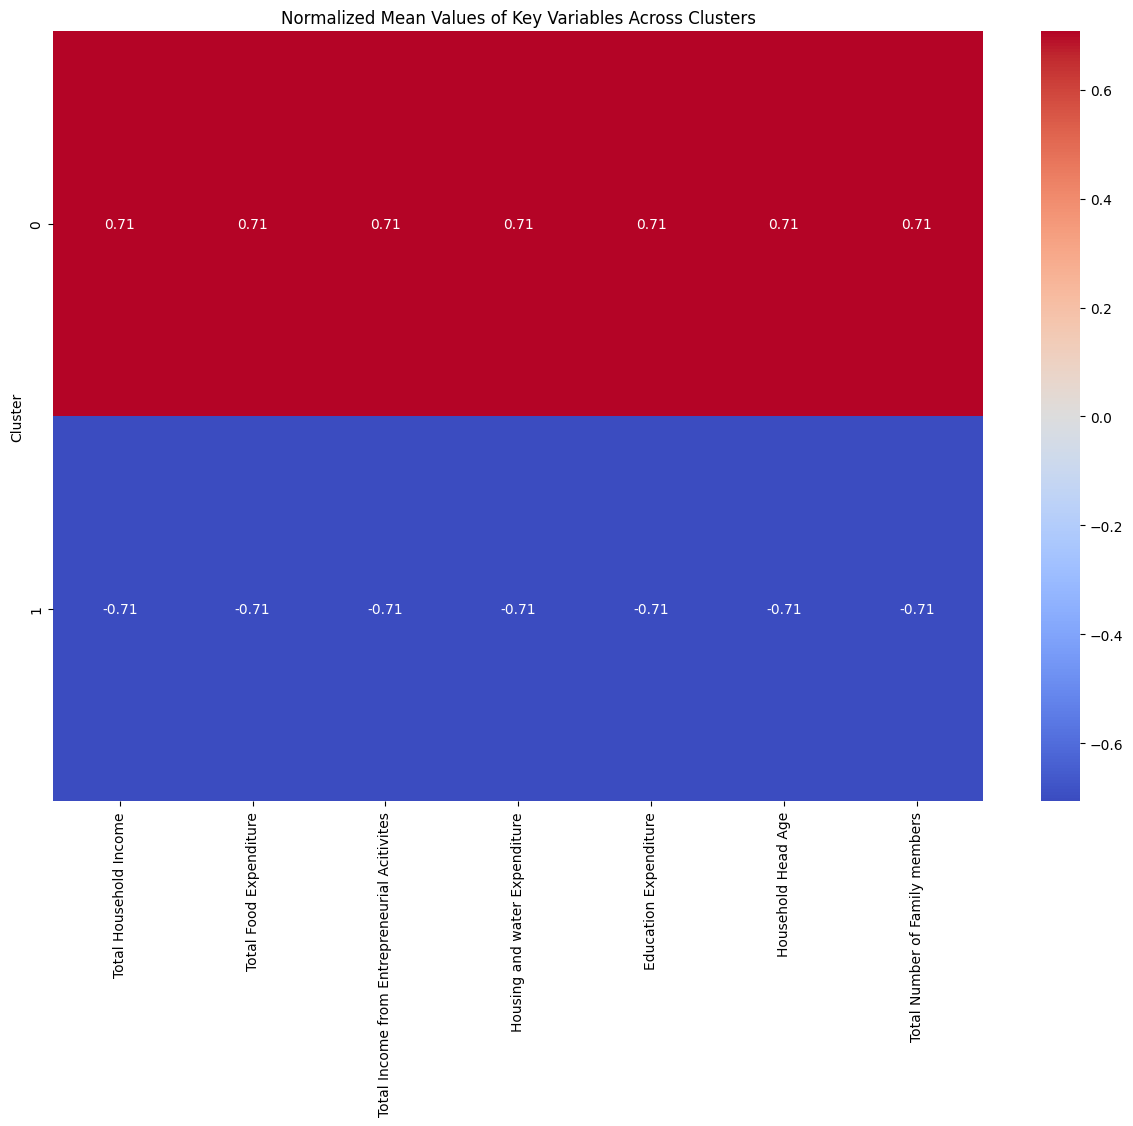

In [105]:
# Plot key characteristics of each cluster
plt.figure(figsize=(15, 10))
cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()
sns.heatmap(cluster_means_normalized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Normalized Mean Values of Key Variables Across Clusters')
plt.show()

In [106]:
# Create a detailed profile for each cluster
print("\nDetailed Cluster Profiles:")
for cluster in range(optimal_k):
    cluster_df = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} Profile (Size: {len(cluster_df)}):")

    # Calculate percentiles for total income and expenditure
    income_percentiles = np.percentile(cluster_df['Total Household Income'], [25, 50, 75])
    expenditure_percentiles = np.percentile(cluster_df['Total Food Expenditure'], [25, 50, 75])

    print(f"Income Distribution (25th, 50th, 75th percentiles): {income_percentiles}")
    print(f"Food Expenditure Distribution (25th, 50th, 75th percentiles): {expenditure_percentiles}")

    # Most common demographic characteristics
    if 'Household Head Sex' in df.columns:
        print(f"Most common household head gender: {cluster_df['Household Head Sex'].mode()[0]}")

    if 'Household Head Age' in df.columns:
        print(f"Average household head age: {cluster_df['Household Head Age'].mean():.1f}")

    if 'Household Head Highest Grade Completed' in df.columns:
        print(f"Most common education level: {cluster_df['Household Head Highest Grade Completed'].mode()[0]}")

    if 'Total Number of Family members' in df.columns:
        print(f"Average family size: {cluster_df['Total Number of Family members'].mean():.1f}")

    # Economic indicators
    if 'Main Source of Income' in df.columns:
        print(f"Most common income source: {cluster_df['Main Source of Income'].mode()[0]}")

    # Calculate income to expenditure ratio
    if 'Total Household Income' in df.columns and 'Total Food Expenditure' in df.columns:
        cluster_df['Income_to_Food_Ratio'] = cluster_df['Total Household Income'] / cluster_df['Total Food Expenditure'].replace(0, np.nan)
        print(f"Average income to food expenditure ratio: {cluster_df['Income_to_Food_Ratio'].mean():.2f}")

    # Housing characteristics
    if 'Type of Building/House' in df.columns:
        print(f"Most common house type: {cluster_df['Type of Building/House'].mode()[0]}")

    # Asset ownership (Pick a few key assets)
    assets = ['Number of Television', 'Number of Car, Jeep, Van', 'Number of Cellular phone', 'Number of Personal Computer']
    for asset in assets:
        if asset in df.columns:
            print(f"Average number of {asset.replace('Number of ', '')}: {cluster_df[asset].mean():.2f}")


Detailed Cluster Profiles:

Cluster 0 Profile (Size: 11315):
Income Distribution (25th, 50th, 75th percentiles): [310746.5  416174.   570503.75]
Food Expenditure Distribution (25th, 50th, 75th percentiles): [104025.5 129864.  165457. ]
Most common household head gender: Male
Average household head age: 52.7
Most common education level: High School Graduate
Average family size: 5.2
Most common income source: Wage/Salaries
Average income to food expenditure ratio: 3.34
Most common house type: Single house
Average number of Television: 1.36
Average number of Car, Jeep, Van: 0.28
Average number of Cellular phone: 3.37
Average number of Personal Computer: 1.00

Cluster 1 Profile (Size: 30229):
Income Distribution (25th, 50th, 75th percentiles): [ 90960. 128880. 179972.]
Food Expenditure Distribution (25th, 50th, 75th percentiles): [44755. 61118. 79540.]
Most common household head gender: Male
Average household head age: 50.9
Most common education level: High School Graduate
Average family 

<ipython-input-106-6ddade8ca2fd>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Income_to_Food_Ratio'] = cluster_df['Total Household Income'] / cluster_df['Total Food Expenditure'].replace(0, np.nan)
<ipython-input-106-6ddade8ca2fd>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Income_to_Food_Ratio'] = cluster_df['Total Household Income'] / cluster_df['Total Food Expenditure'].replace(0, np.nan)


In [107]:
# Final summary with key insights
print("\n=====================")
print("SUMMARY OF FINDINGS")
print("=====================")
print(f"- Successfully identified {optimal_k} distinct socioeconomic clusters with a silhouette score of {max(silhouette_scores):.3f}")
print("- Key differentiating factors between clusters:")

# Find the top differentiating variables
cluster_means_var = cluster_means.var()
top_diff_vars = cluster_means_var.sort_values(ascending=False).index[:5]
print(f"  * {', '.join(top_diff_vars)}")

print("- Socioeconomic disparities are evidenced by:")
if 'Total Household Income' in cluster_means.columns:
    highest_income = cluster_means['Total Household Income'].idxmax()
    lowest_income = cluster_means['Total Household Income'].idxmin()
    income_disparity = cluster_means.loc[highest_income, 'Total Household Income'] / cluster_means.loc[lowest_income, 'Total Household Income']
    print(f"  * Income disparity: Cluster {highest_income} has {income_disparity:.1f}x higher average income than Cluster {lowest_income}")

print("- Potential policy implications:")
print("  * Targeted interventions could focus on specific needs of each identified cluster")
print("  * Education and housing support might be prioritized for lower-income clusters")
print("  * Financial literacy programs could be tailored to spending patterns observed in each group")


SUMMARY OF FINDINGS
- Successfully identified 2 distinct socioeconomic clusters with a silhouette score of 0.425
- Key differentiating factors between clusters:
  * Total Household Income, Total Food Expenditure, Housing and water Expenditure, Total Income from Entrepreneurial Acitivites, Education Expenditure
- Socioeconomic disparities are evidenced by:
  * Income disparity: Cluster 0 has 2.9x higher average income than Cluster 1
- Potential policy implications:
  * Targeted interventions could focus on specific needs of each identified cluster
  * Education and housing support might be prioritized for lower-income clusters
  * Financial literacy programs could be tailored to spending patterns observed in each group
